# The Movie Industry

# Project Objectives

The entertainment industry is diverse so it has something for everyone. Films are one of the best forms of entertainment because they offer something for everyone. The quality of the film plays an important role in attracting the audience to watch it. But how should we define the quality of the film? Perhaps I can construct several questions like

* What are the typical features of making a good film?
* What correlation between features that can be discover? 


# Data Preparation

To answer the project's objectives, we need to find a dataset that potentially has the answer. The best & quick way to get a dataset is to look at any public data source. In this case, kaggle will be the main choice as it has such a kind of data set. The dataset is organized in a wide data format & saved as a CSV file. The file will later be uploaded into my online workspace as it will be easy for me to retrieve it at any machine. Based on the documentation, the data was collected via scraping the HTML IMDb website conducted by a kaggle user named Daniel Grijalva & was later uploaded in Sep 2017. A second version was later updated & uploaded on Aug 2021. Dataset is protected & licensed under the CC0 1.0 Universal (CC0 1.0) Public Domain Dedication which users are allowed to copy, modify, distribute & perform the work, even for commercial purposes, all without asking permission. I will be using the python programming language to conduct the analysis via datacamp workspace platform.


In [1]:
# import all relevant python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(12,8)

# read & upload the dataset
movies = pd.read_csv("movies.csv")

# get an overview of the dataset
print(movies.head(5))
print(movies.info())

# checking for null values
print(movies.isnull().sum())

# checking for any duplicated records
# checking for duplicated values in the "name" column, logically the name should be unique
print("The dataset contains", movies.duplicated().sum(), "duplicated values")
print("There are a total of", movies.duplicated(subset="name").sum(), "duplicated values")

                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nic


A quick overview of the data set, I found some interesting numerical features like score, audience votes, movie's runtime, budget & gross. These features might help & answer the project objectives. But before going any deeper, this data set must undergo some cleaning, transformation process & data verification to avoid any errors. With that being said, let's jump to the data processing at each column.


# Data Processing

## Null Values

First of all, I am looking at & defining the null values present in the dataset. I've identified around 2473 null values & I think it's better to remove them from the dataset. It is now being reduced to 5421 rows.


In [2]:
# removing all null values present at respective columns
drop_na = ["rating",
           "released",
           "score",
           "votes",
           "writer",
           "star",
           "country",
           "budget",
           "gross",
           "company",
           "runtime"]

movies.dropna(subset=drop_na, inplace=True)
print(movies.isnull().sum())
print(movies.shape)

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64
(5421, 15)


## Duplicate Values

Earlier I've discovered, that the movie name contain 156 duplicated values. But does the records is really a duplicated values? Lets take a closer a look at the duplicated values at the name column.


In [3]:
# extracting the duplicated values in the "name" column
duplicated_movie_name = movies[movies.duplicated(subset="name", keep=False)].sort_values("name")
print(duplicated_movie_name)

                           name rating      genre  year  \
5712  A Nightmare on Elm Street      R      Crime  2010   
483   A Nightmare on Elm Street      R     Horror  1984   
7481                    Aladdin     PG  Adventure  2019   
2056                    Aladdin      G  Animation  1992   
3196              Anna Karenina  PG-13      Drama  1997   
...                         ...    ...        ...   ...   
1976            Under Suspicion      R      Crime  1991   
3036              Unforgettable      R      Drama  1996   
7147              Unforgettable      R      Drama  2017   
1812         Where the Heart Is      R     Comedy  1990   
3708         Where the Heart Is  PG-13     Comedy  2000   

                               released  score     votes        director  \
5712     April 30, 2010 (United States)    5.2   95000.0    Samuel Bayer   
483   November 16, 1984 (United States)    7.5  212000.0      Wes Craven   
7481       May 24, 2019 (United States)    6.9  239000.0     Gu


It looks like the duplicated movies are actually doing a remake. Thus, we are going to ignore duplicated values in this dataset.


## Column Data Type

The votes, budget, gross & runtime is in a float data type. It should converted to integer data type to provide a better measurement. Looks like genre & rating is group into respective classification, so I will change that as well.


In [4]:
# changing the current data type to appropriate data type at related columns
convert_data = {"votes" : "int",
                "budget":"int",
                "gross":"int",
               "runtime":"int"}

movies = movies.astype(convert_data)
print(movies.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object


## Inconsistentency of Values

The "released" column contained month, year, day & country. This dataset also contain the year & country. So which one should I follow? Lets make a quick comparison between released, year & country.


In [5]:
movies[["name","released","year","country"]].sample(50)

,name,released,year,country
6855,Arrival,"November 11, 2016 (United States)",2016,United States
6583,Draft Day,"April 11, 2014 (United States)",2014,United States
5050,Transformers,"July 3, 2007 (United States)",2007,United States
551,The Pope of Greenwich Village,"June 22, 1984 (United States)",1984,United States
225,Rocky III,"May 28, 1982 (United States)",1982,United States
5581,Brooklyn's Finest,"March 5, 2010 (United States)",2009,United States
235,The Dark Crystal,"December 17, 1982 (United States)",1982,United Kingdom
2358,Red Rock West,"May 14, 1993 (Italy)",1993,United States
1627,Bloodhounds of Broadway,"November 3, 1989 (United States)",1989,United States
929,The Big Easy,"August 21, 1987 (United States)",1986,United States



Looking at the sample shown, we identified some inconsistency between the columns like "My Neighbor Totoro", "Romancing the Stone", "Penelope", "The Living Daylights" & the list goes on. But which one is correct? I took some several sample & do some quick research in wikipedia between the country, year in released column & country, year column. It turns out the year & country in released column is giving the correct information. Thus, I can further process the column & split it accordingly.


In [6]:
# extract only the year
def extract_year(texts):
       for year in texts.split():
            if year.isdigit():
                return int(year)

# apply the released column & reassign back to year column
movies["year"] = movies["released"].apply(extract_year)
print(movies.year.value_counts(dropna=False))

2011    170
2002    169
2003    168
2008    167
2000    166
2009    166
2007    165
2015    163
2010    162
2006    162
2014    161
2013    161
2001    159
2005    159
1999    159
2004    159
2016    158
2012    158
1998    148
1997    147
2017    146
2018    144
1996    143
1995    139
1993    134
1994    134
1992    124
2019    121
1989    121
1988    120
1991    116
1990    108
1987    104
1986     98
1985     96
1984     88
1983     86
1982     71
1981     54
1980     36
2020     11
Name: year, dtype: int64


In [7]:
# extract only the month 
def extract_month(text):
    months = re.finditer(r'(^[A-Z])\w+',text)
    for month in months:
        trim = month.group(0)
        return trim

# apply the released column & expand into a new column
movies["released_month"] = movies["released"].apply(extract_month)
print(movies.released_month.value_counts(dropna=False))

October      522
August       515
November     495
December     451
March        449
July         446
January      444
September    437
June         427
April        422
February     418
May          390
NaN            5
Name: released_month, dtype: int64


In [8]:
# to extract country in a bracket
def extract_country(text):
    countries = re.finditer(r'\(.*?\)',text)
    for country in countries:
        trim = country.group(0).strip("()")
        return str(trim)

# apply the released column & reassign back to country column
movies["country"] = movies["released"].apply(extract_country)
print(movies.country.value_counts(dropna=False))

United States           5076
United Kingdom            87
France                    41
Germany                   25
Australia                 14
Spain                     14
Canada                    13
Japan                     12
South Korea               10
Italy                     10
Denmark                    9
Brazil                     9
Argentina                  7
Israel                     6
Russia                     6
China                      6
Netherlands                6
Greece                     5
Norway                     4
Hong Kong                  4
Singapore                  4
Iceland                    4
Ireland                    4
South Africa               4
Sweden                     3
Mexico                     3
India                      3
Taiwan                     3
Portugal                   2
Belgium                    2
Poland                     2
Turkey                     2
Iran                       2
Philippines                2
Croatia       

## Add & Drop Column 

Another interesting thing that I should consider is the total revenue received from each movie. The revenue metrics could be our success metrics & display most perform movies. Then, removing columns that are not signifigant in the data set.


In [9]:
# adding the revenue column
movies["total_revenue"] = movies["gross"] - movies["budget"]
print(movies.columns)

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'released_month', 'total_revenue'],
      dtype='object')


In [10]:
# drop the released column from the dataset
movies.drop(["released"], axis=1, inplace=True)
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5421 non-null   object 
 1   rating          5421 non-null   object 
 2   genre           5421 non-null   object 
 3   year            5421 non-null   int64  
 4   score           5421 non-null   float64
 5   votes           5421 non-null   int64  
 6   director        5421 non-null   object 
 7   writer          5421 non-null   object 
 8   star            5421 non-null   object 
 9   country         5421 non-null   object 
 10  budget          5421 non-null   int64  
 11  gross           5421 non-null   int64  
 12  company         5421 non-null   object 
 13  runtime         5421 non-null   int64  
 14  released_month  5416 non-null   object 
 15  total_revenue   5421 non-null   int64  
dtypes: float64(1), int64(6), object(9)
memory usage: 720.0+ KB
None


# Analyze & Visualize Data

Now I have a clean data set. It's time to do some data exploration & answer the project objectives.


In [11]:
# sorted data by revenue
movies.sort_values("total_revenue", ascending=False).head(10)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_month,total_revenue
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,December,2610246203
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,April,2441501328
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,December,2001647264
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,December,1824521700
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,April,1727359754
6653,Jurassic World,PG-13,Action,2015,7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124,June,1520516444
7480,The Lion King,PG,Animation,2019,6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118,July,1410727580
6646,Furious 7,PG-13,Action,2015,7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137,April,1325341399
7494,Frozen II,PG,Animation,2019,6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103,November,1300026933
6043,The Avengers,PG-13,Action,2012,8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143,May,1298815515



Looks like Avatar rank the highest based on total revenue received. Its kinda hard looking the overall dataset using cross table, perhaps it will be better using charts to show the results.


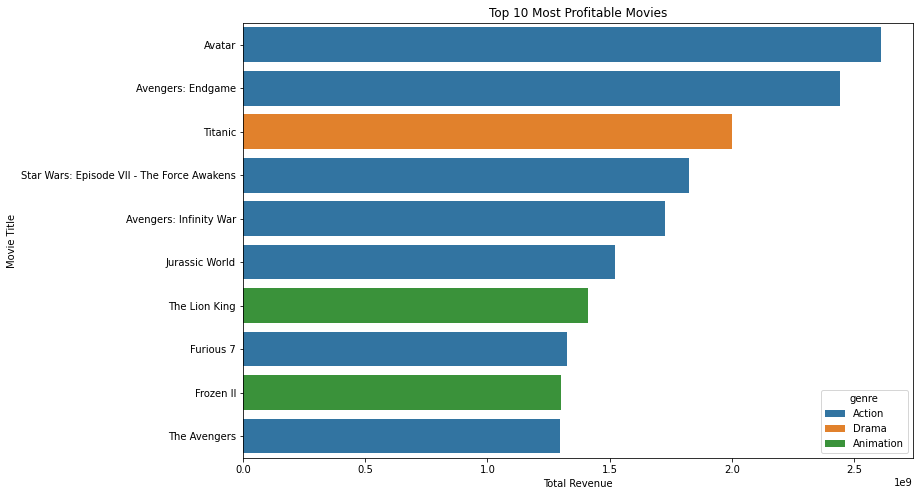

In [12]:
# creating a bar plot & showing the most profitable movies of all time
top_movies_revenue = movies[["name","total_revenue","genre"]].sort_values("total_revenue", ascending=False).head(10)
sns.barplot(x=top_movies_revenue.total_revenue, y=top_movies_revenue.name, data=top_movies_revenue, hue=top_movies_revenue.genre, dodge=False)

plt.xlabel("Total Revenue")
plt.ylabel("Movie Title")
plt.title("Top 10 Most Profitable Movies")
plt.show()

In this top ten movie list, 7 out of 10 are action movies genre. Interestingly all of the avengers' movies are in the top ten list. It is almost 24 years since the release of Titanic & it is still the top 3 most profitable movies of all time. I want to keep going looking at the genre movie type & try to discover any other insight.

           count           sum     median
genre                                    
Action      1415  155019855699   28718711
Animation    277   56724339110  121705322
Comedy      1496   54402469405    9416101
Drama        863   32040824782    4760107
Adventure    327   28550151908   17610873
Biography    311   11181571528    9540607
Crime        399   10999106082    2700000
Horror       251   10888988032   19795897
Family         4    1869832587  391139034
Mystery       17    1462191466   11726793
Fantasy       41     928826609   10738769
Thriller       7     208216988   28599361
Sci-Fi         6      79160614   -2994176
Romance        5      47676905   -4835596
Western        2       -974114    -487057


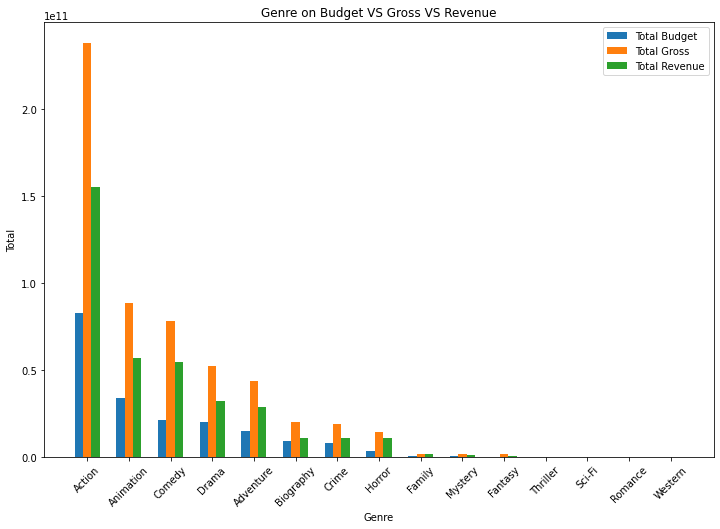

In [13]:
# summary overview of total revenue by genre
genre_overview = movies.groupby("genre")["total_revenue"].agg(["count","sum","median"]).sort_values("sum", ascending=False)
print(genre_overview)

# visual genre with budget, gross & total revenue
w = 0.2
genre_category = ["Action","Animation","Comedy","Drama","Adventure","Biography","Crime","Horror","Family","Mystery","Fantasy","Thriller","Sci-Fi","Romance","Western"]
genre_budget = movies.groupby("genre")["budget"].sum().sort_values(ascending=False)
genre_gross = movies.groupby("genre")["gross"].sum().sort_values(ascending=False)
genre_revenue = movies.groupby("genre")["total_revenue"].sum().sort_values(ascending=False)

bar1 = np.arange(len(genre_category))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

plt.bar(bar1, genre_budget, w, label="Total Budget")
plt.bar(bar2, genre_gross, w, label="Total Gross")
plt.bar(bar3, genre_revenue, w, label="Total Revenue")
plt.xticks(bar1+w, genre_category, rotation=45)
plt.xlabel("Genre")
plt.ylabel("Total")
plt.title("Genre on Budget VS Gross VS Revenue")
plt.legend()
plt.show()

Based on the outcome, the action genre collects the most revenue follow by animation, comedy & etc. Interestingly, although the animation only has a total of 277 movies produced it surpasses comedy by total revenue. Perhaps the animation genre is generally accepted by all ages, I mean Frozen is actually a pretty fun film to watch. Alright, let's explore more on this data set.

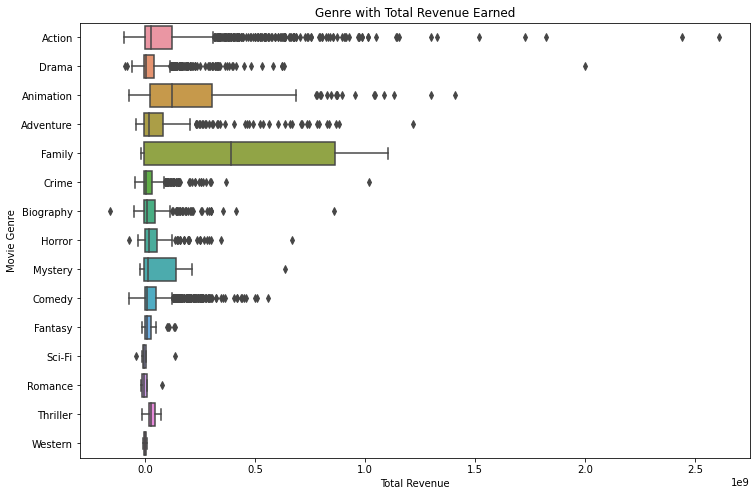

In [14]:
# creating boxplot by genre 
genre_boxplot = movies[["genre","total_revenue"]]
sort_boxplot = genre_boxplot.sort_values(by="total_revenue", ascending=False)

sns.boxplot(x="total_revenue", y="genre", data=sort_boxplot)
plt.xlabel("Total Revenue")
plt.ylabel("Movie Genre")
plt.title("Genre with Total Revenue Earned")
plt.show()

The median value in the family genre is the highest. There is greater variability in family genres data compared to other genres which are less dispersed. Looking at the boxplot, most of the genre data is right-skewed or positively skewed since the median line is closer to the bottom of the box. Most of the genre contains outliers data except for family, thriller & western. Next, I will take a look at the revenue column.

count    5.421000e+03
mean     6.722048e+07
std      1.590042e+08
min     -1.580311e+08
25%     -3.189887e+06
50%      1.385152e+07
75%      7.025820e+07
max      2.610246e+09
Name: total_revenue, dtype: float64


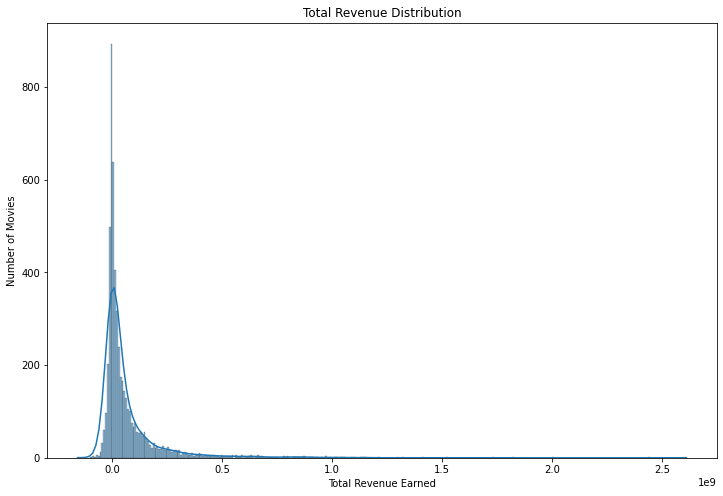

In [15]:
# summary statistic by revenue
print(movies.total_revenue.describe())

# displaying histogram chart by total revenue earn
sns.histplot(x="total_revenue", data=movies, kde=True)
plt.xlabel("Total Revenue Earned")
plt.ylabel("Number of Movies")
plt.title("Total Revenue Distribution")
plt.show()

At the 25th percentile or 25%, several movies are making losses approximately at or below -3.19. Next in the 50th percentile or 50%, I can see the movies are already making profit approximately at or below 1.39. The histogram chart of total revenue is a right skew as the tail is moving toward the right of the charts.

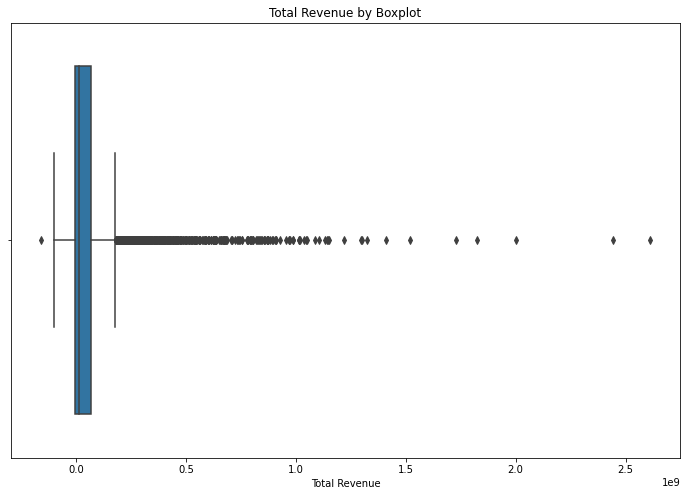

In [16]:
# displaying boxplot chart by total revenue earn
sns.boxplot(x="total_revenue", data=movies)
plt.xlabel("Total Revenue")
plt.title("Total Revenue by Boxplot")
plt.show()

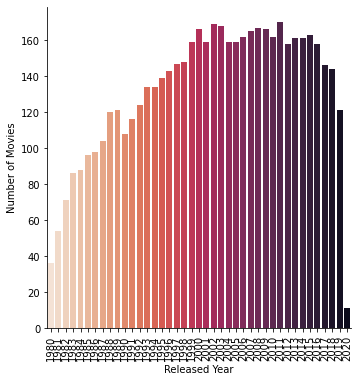

In [17]:
movies["year"] = movies["year"].astype("category")

# visualizing year
sns.catplot(x="year", data=movies, kind="count", palette="rocket_r")
plt.xlabel("Released Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=90)
plt.show()

There is an increase in movies being produced since 1980 & a steady trend from 1999 until 2016. A huge drop in 2020 was mainly because of the coronavirus (COVID-19) hit globally & causing a huge economical breakdown.

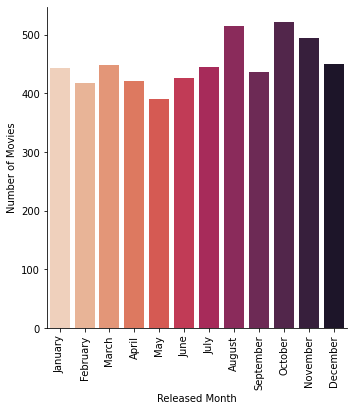

In [18]:
# displaying total movie released by month
month_cat = movies.released_month.dropna().astype("category")
month_order= month_cat.cat.reorder_categories(new_categories=["January","February", "March","April","May","June","July","August","September","October","November","December"],ordered=True,inplace=True)
sns.catplot(x=month_cat, data=movies, kind="count", palette="rocket_r")
plt.xlabel("Released Month")
plt.ylabel("Number of Movies")
plt.xticks(rotation=90)
plt.show()

Based on the chart, most of the movies are released in October followed by August & November. I can say that most of the movies were released either in the 3rd or 4th quarter of a year. Now let's explore the correlation between the features. The most obvious feature will be between budget & the total revenue earned.

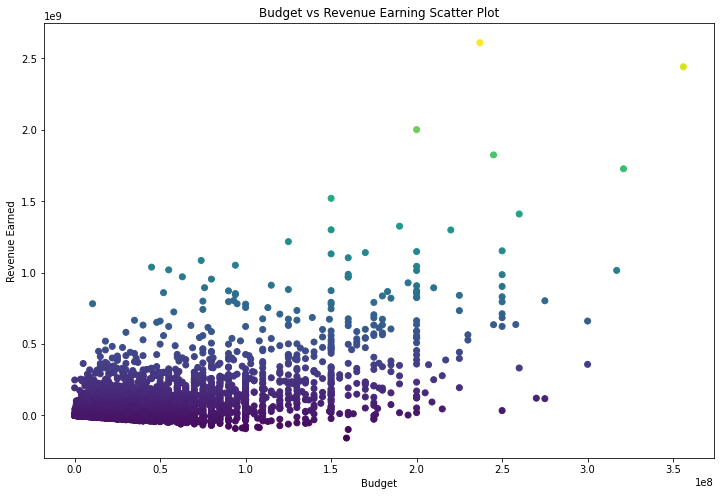

In [19]:
# Budget vs Revenue correlation using matplotlib
plt.scatter(x=movies.budget, y=movies.total_revenue, c=movies.total_revenue, cmap="viridis")
plt.title("Budget vs Revenue Earning Scatter Plot")
plt.xlabel("Budget")
plt.ylabel("Revenue Earned")
plt.show()

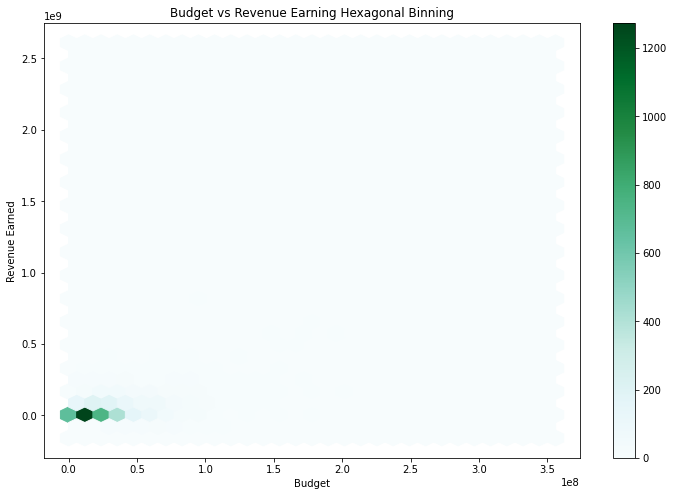

In [20]:
# Budget vs Revenue correlation using hexagonal binning
movies.plot.hexbin(x="budget", y="total_revenue", gridsize=30, sharex=False)
plt.title("Budget vs Revenue Earning Hexagonal Binning")
plt.xlabel("Budget")
plt.ylabel("Revenue Earned")
plt.show()

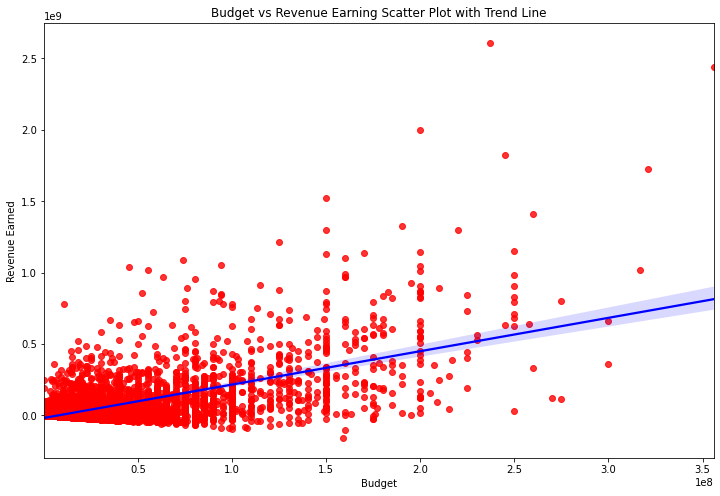

In [21]:
# Budget vs Gross correlation using seaborn
sns.regplot(x="budget", y="total_revenue", data=movies, scatter_kws={"color":"red"}, line_kws={"color":"blue"} )
plt.title("Budget vs Revenue Earning Scatter Plot with Trend Line")
plt.xlabel("Budget")
plt.ylabel("Revenue Earned")
plt.show()

Now it looks like there is a positive relationship between budget & revenue earned. I mean it should make sense as the more you invest to produce something better, the more return you will receive since consumers tend to like it. Next, let's take a closer look into other numerical features. Is there any positive correlation?

In [22]:
# pearson correlation on numerical data
movies.corr(method="pearson")

,score,votes,budget,gross,runtime,total_revenue
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.243340
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.609203
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.610530
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.984428
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.241554
total_revenue,0.243340,0.609203,0.610530,0.984428,0.241554,1.000000


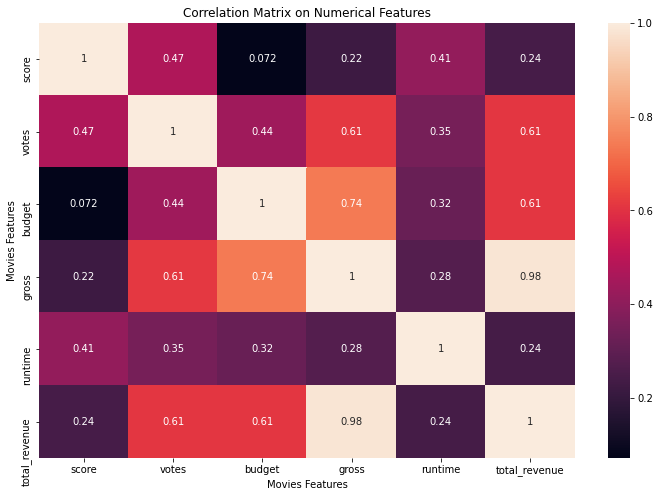

In [23]:
# Correlation Matrix on Numerical Features Using heatmap
correlation_matrix = movies.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix on Numerical Features")
plt.xlabel("Movies Features")
plt.ylabel("Movies Features")
plt.show()

It seems that other than budget, votes are also an interesting factor in producing a good movie. The better the quality of a movie, the more vote count a movie can gain. This will indirectly attract other consumers to watch it as well. Now, how about other features present in the data set? Perhaps I can change it to categorical data and make it as numerical data.

In [24]:
# all features with object data type are converted to categorical value
movies_num = movies
for features in movies_num.columns:
    if (movies_num[features].dtype=="object"):
        movies_num[features] = movies_num[features].astype("category")
        movies_num[features] = movies_num[features].cat.codes

print(movies_num)

      name  rating  genre  year  score    votes  director  writer  star  \
0     4692       6      6  1980    8.4   927000      1795    2832   699   
1     3929       6      1  1980    5.8    65000      1578    1158   214   
2     3641       4      0  1980    8.7  1200000       757    1818  1157   
3      204       4      4  1980    7.7   221000       889    1413  1474   
4      732       6      4  1980    7.3   108000       719     351   271   
...    ...     ...    ...   ...    ...      ...       ...     ...   ...   
7648   415       6      0  2020    6.6   140000        16    2390  1812   
7649  3556       4      0  2020    6.5   102000       852    2309   147   
7650  1153       4      1  2020    5.6    53000      1809    2827  1470   
7651  3978       4      1  2020    6.8    42000       294    2091   640   
7652  4090       3      0  2020    6.8     3700       746    1184  1839   

      country     budget      gross  company  runtime  released_month  \
0          47   19000000  

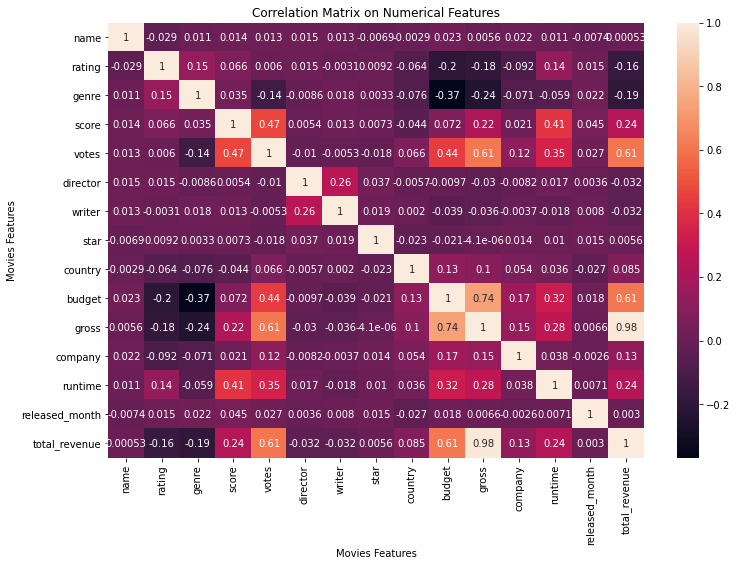

In [25]:
# creating heatmap visualization based on numerical data
correlation_matrix = movies_num.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix on Numerical Features")
plt.xlabel("Movies Features")
plt.ylabel("Movies Features")
plt.show()

In [26]:
correlation_matrix = movies.corr()
corr_pairs = correlation_matrix.unstack()
print(corr_pairs)

name           name              1.000000
               rating           -0.029234
               genre             0.010996
               score             0.014450
               votes             0.012615
                                   ...   
total_revenue  gross             0.984428
               company           0.131659
               runtime           0.241554
               released_month    0.003050
               total_revenue     1.000000
Length: 225, dtype: float64


In [27]:
sorted_pairs = corr_pairs.sort_values()
print(sorted_pairs)

genre           budget           -0.368523
budget          genre            -0.368523
genre           gross            -0.244101
gross           genre            -0.244101
budget          rating           -0.203946
                                    ...   
score           score             1.000000
genre           genre             1.000000
rating          rating            1.000000
released_month  released_month    1.000000
total_revenue   total_revenue     1.000000
Length: 225, dtype: float64


In [28]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
print(high_corr)

total_revenue   votes             0.609203
votes           total_revenue     0.609203
budget          total_revenue     0.610530
total_revenue   budget            0.610530
gross           votes             0.614751
votes           gross             0.614751
gross           budget            0.740247
budget          gross             0.740247
gross           total_revenue     0.984428
total_revenue   gross             0.984428
name            name              1.000000
star            star              1.000000
runtime         runtime           1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
genre           genre             1.000000
rating          rating            1.000000
released_mo

# Conclusion



This project aims to identify what are the features needed in making a good movie. Based on the insight, I would say people tend to like more action movies followed by animation, comedy & drama. Perhaps it can be more impactful if a movie has a combination of these genres. The month of movie release could also take into consideration as people usually watch movies during their free time or during the holidays.

Then, there are several correlations that were discovered based on the analysis conducted. The amount of investment is also significant in producing such movies. This is perhaps due to more advanced tools being used, hiring high rating actors & etc. When a movie has its finest quality, people will give good reviews & ratings, thus, indirectly will attract more people to watch it